# CPSC 330 hw4

Note: this assignment covers 2 weeks' worth of material (lectures 6-9).

Note: the assignments will get gradually more open-ended as we progress through the course. In many cases there is no single correct solution.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Add more imports below as needed
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
plt.rcParams['font.size'] = 16

## Instructions
rubric={points:5}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

In particular, please make sure all your output is showing up in the final rendered version. **Also, please do not delete the question cells or move the questions around.** This will make things easier for the TAs.

Also: if available, you are welcome to use scikit-learn functions for any of the tasks below, such as confusion matrix. You are not required to implement them yourselves. 

## Writing quality/quantity
rubric={points:5}

The TAs have reported a couple issues with the first few assignments: in some cases, submissions simply show the code output with no commentary; please write at least a sentence explaining your output in each question. In other cases, the TAs have come across multi-paragraph answers where a couple of sentences would have sufficed. Thus, we are now allocating the above points for well-structured answers of a reasonable length. In general, 1-3 sentences is good.

## Customer churn data

[Customer churn](https://en.wikipedia.org/wiki/Customer_attrition) refers to the notion of customers leaving a subscription service like Netflix. In this exercise, we will try to predict customer churn in a dataset where most of the customers stay with the service and a small minority cancel their subscription. To start, please download the [Kaggle telecom customer churn dataset](https://www.kaggle.com/becksddf/churn-in-telecoms-dataset). As usual, do not push the CSV to your repo. One you have the data, you should be able to run the following code:

In [3]:
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv', encoding='latin-1')

In [4]:
df_train, df_test = train_test_split(df, test_size=0.1, random_state=123)

In [5]:
df_train.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
380,SD,137,510,373-5732,no,no,0,242.1,118,41.16,...,93,16.24,218.6,50,9.84,14.7,2,3.97,3,False
2352,VA,118,408,404-2877,no,no,0,154.8,71,26.32,...,73,20.74,159.6,81,7.18,12.8,4,3.46,0,False
693,NJ,92,510,420-8242,no,yes,29,155.4,110,26.42,...,104,16.02,254.9,118,11.47,8.0,4,2.16,3,False
527,NJ,95,415,379-6652,no,yes,22,40.9,126,6.95,...,90,11.34,264.2,91,11.89,11.9,7,3.21,0,False
2556,WA,118,510,422-2571,no,no,0,113.0,80,19.21,...,87,12.76,204.3,115,9.19,10.8,4,2.92,2,False


The last column (`churn`) is the target. "True" means the customer left the subscription (churned) and "False" means they stayed.


## Exercise 1

#### 1(a)
rubric={points:4} 

Perform some exploratory data analysis on the training set. In particular:

- How many rows and columns are there?
- How many True/False target values are there?

Come up with **two** more exploratory questions you would like to answer (similar to the above two), and explore those as well. Briefly discuss your results in 1-3 sentences.

You are welcome to use `pandas_profiling` (see Lecture 6) but you don't have to.

In [6]:
num_rows = len(df_train)
num_cols = len(df_train.columns)
num_true = len(df_train[df_train['churn'] == True])
num_false = len(df_train[df_train['churn'] == False])

print('\033[1m' + 'Answer:' + '\033[0m')
print(f'# Rows: {num_rows}, # Columns: {num_cols}')
print(f'# True Target Values: {num_true}, # False Target Values: {num_false}')
print('Additional Question: Do any columns contain missing values?')
df_train.info()
print('No - each column has a full set of 2999 observations')
print('Additional Question: What is the mean and standard deviation of each numeric column?')
answers = pd.DataFrame(df_train.describe().loc[['mean', 'std']])
answers

Answer:
# Rows: 2999, # Columns: 21
# True Target Values: 443, # False Target Values: 2556
Additional Question: Do any columns contain missing values?
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 380 to 1346
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   2999 non-null   object 
 1   account length          2999 non-null   int64  
 2   area code               2999 non-null   int64  
 3   phone number            2999 non-null   object 
 4   international plan      2999 non-null   object 
 5   voice mail plan         2999 non-null   object 
 6   number vmail messages   2999 non-null   int64  
 7   total day minutes       2999 non-null   float64
 8   total day calls         2999 non-null   int64  
 9   total day charge        2999 non-null   float64
 10  total eve minutes       2999 non-null   float64
 11  total eve calls         2999 non-null   int64 

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
mean,100.607536,436.879627,8.107703,179.955852,100.535845,30.593034,200.509403,99.974992,17.043515,200.653885,100.157719,9.029503,10.222341,4.494498,2.760577,1.571524
std,39.563121,42.217691,13.678285,54.541592,20.089392,9.272057,50.728821,19.896607,4.311942,50.453924,19.536152,2.270485,2.797823,2.474935,0.755375,1.335412


The number of rows and columns suggest we have plenty of data to train on, but because ~85% of the target values are `False` (which would be the score and value predicted by `DummyClassifier`) and only ~15% are `True`, we have a reasonably imbalanced dataset. We likely don't _need_ to account for missing values as no column contains null data. The means and standard deviations suggest that differences in magnitude exist; therefore standardizing or normalizing could be helpful.

#### 1(b)
rubric={points:10}

In preparation for building a classifier, set up a `ColumnTransformer` that performs whatever feature transformations you deem sensible. This can include dropping features if you think they are not helpful. Remember that by default `ColumnTransformer` will drop any columns that aren't accounted for when it's created.

In each case, briefly explain your rationale with 1-2 sentences. You do not need an explanation for every feature, but for every group of features that are being transformed the same way. For example, "I am doing transformation X to the following categorical features: `a`, `b`, `c` because of reason Y," etc.

In [7]:
X_train = df_train.drop(columns=["churn"])
X_test  = df_test.drop(columns=["churn"])

y_train = df_train["churn"]
y_test  = df_test["churn"]

In [8]:
categorical_features = ['state', 'area code', 'international plan', 'voice mail plan']
numeric_features = ['account length', 'number vmail messages',
                    'total day minutes', 'total day calls', 'total day charge',
                    'total eve minutes', 'total eve calls', 'total eve charge',
                    'total night minutes', 'total night calls', 'total night charge',
                    'total intl minutes', 'total intl calls', 'total intl charge',
                    'customer service calls']

# Adapted from Lecture 7

pipe_cat = Pipeline([
    ('impute', SimpleImputer(strategy='constant', fill_value = 'MISSING')),
    ('ohe', OneHotEncoder(handle_unknown='error', sparse=False, dtype='int', drop='if_binary'))
])

pipe_num = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('standardize', StandardScaler())
])

preprocessor = ColumnTransformer([
    ('cat', pipe_cat, categorical_features),
    ('num', pipe_num, numeric_features)
])

# Just to check the transformer works
preprocessor.fit(X_train)
X_train_transformed = preprocessor.transform(X_train)
new_col_names = list(preprocessor.named_transformers_['cat']['ohe'].get_feature_names(categorical_features)) + numeric_features
X_train_transformed = pd.DataFrame(data=X_train_transformed, columns=new_col_names, index=X_train.index)
X_train_transformed

,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,...,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.187487,-0.350620,-0.186377,0.355752,-2.567859,0.357030,1.600675,-1.008073,1.601358,1.069868
2352,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.857458,-1.355984,0.857410,-0.813826,-0.980793,-0.814721,0.921463,-0.199836,0.926083,-1.177005
693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.236777,0.202330,-0.237407,1.075341,0.913448,1.075059,-0.794443,-0.199836,-0.795204,1.069868
527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.323125,-0.501425,-1.322946,1.259698,-0.468836,1.260072,0.599730,1.012519,0.595066,-1.177005
2556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.993869,-0.652230,-0.993573,0.072278,0.759861,0.070700,0.206502,-0.199836,0.211087,0.320910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.906748,0.604476,0.906120,1.677971,0.196708,1.678555,0.814218,1.416638,0.820158,0.320910
3089,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.601522,-0.400889,-0.601573,-1.442227,-1.646337,-1.440243,-0.293971,-0.199836,-0.292059,1.069868
1766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.196943,1.056889,-1.197691,-0.575946,-0.212857,-0.576847,0.492486,1.012519,0.489141,0.320910
1122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.898862,2.363863,0.899161,0.819619,0.299100,0.819564,0.063510,0.204283,0.065440,-0.428047


**Answer:**
* I am imputing `categorical_features` to keep the code maintainable. Although missing values don't exist, if more data is added with missing values, this will handle it by replacing them with 'MISSING'.
* I am one-hot encoding `categorical_features` to convert them into boolean values (because they are not ordinal). I used 'if_binary' because `international plan` and `voice mail plan` need only one column each, and if there are unknowns it will produce an error.
* I am imputing `numerical_features` to keep the code maintainable. Although missing values don't exist, if more data is added with missing values, this will handle it by replacing them with the mean of the column.
* I am standardizing `numerical_features` to give each numeric feature a mean of 0 and standard deviation of 1. This ensures differences in orders of magnitude do not affect the model.
* `ColumnTransformer` automatically drops `phone number`; because this is simply identifying data, I don't think it's a useful predictor of churn.

#### 1(d)
rubric={points:3}

The original dataset had a feature called `area code`. Let's assume we encoded this feature with one-hot encoding.

1. The area codes were numbers to begin with. Why do we want to use one-hot encoding on this feature?
2. What were the possible values of `area code`? 
3. What new binary feature(s) were created to replace `area code`? 
4. For each possible value of `area code`, how is this value represented in the transformed data? For example, for a different feature called `international plan` has two values, "no" and "yes". In the transformed data, there is new feature called `international plan_yes`, where "yes" is represented as 1.0 and "no" is represented as 0.0. (There may also be a new feature called `international plan_no` depending on what hyperparameters you used in your `OneHotEncoder` - either way is fine.)

In [9]:
ohe = OneHotEncoder(sparse=False, dtype='int')
ohe.fit(df_train[['area code']])
print("Value counts:" )
print(df_train['area code'].value_counts())
print("\nFeature names:")
print(ohe.get_feature_names(['area code']))

Value counts:
415    1488
408     764
510     747
Name: area code, dtype: int64

Feature names:
['area code_408' 'area code_415' 'area code_510']


**Answer:**
1. Running `df_train['area code'].value_counts()` reveals only 3 unique values, indicating that `area code` is a categorical variable, so we should use one-hot encoding.
2. Possible values of `area code` are 415, 408, and 510.
3. The new binary features created are `area code_408`, `area code_415`, `area code_510`.
4. In the transformed data, each value in `area code` is represented by a 1 in its corresponding column, and 0 in the other newly created columns.
 * 408 is represented as a 1 in `area code_408`, 0 in `area code_415` and `area code_510`
 * 415 is represented as a 1 in `area code_415`, 0 in `area code_408` and `area code_510`
 * 510 is represented as a 1 in `area code_510`, 0 in `area code_415` and `area code_408`

#### 1(e)
rubric={points:4}

Create a `DummyClassifier` using `strategy='prior'`. Report the following scoring metrics via cross-validation: accuracy, precision, recall, F1-score. Briefly comment on your results, including any warnings the code produces (2 sentences max).

In [10]:
dc = DummyClassifier(strategy='prior')
dc_cv_results = pd.DataFrame(cross_validate(dc, X_train, y_train, scoring=['accuracy', 'precision', 'recall', 'f1']))
print('Average across folds:')
print(dc_cv_results.mean())
print('\nFull results')
dc_cv_results

Average across folds:
fit_time          0.000000
score_time        0.006255
test_accuracy     0.852284
test_precision    0.000000
test_recall       0.000000
test_f1           0.000000
dtype: float64

Full results


C:\Users\Sherwyn D'Souza\.conda\envs\cpsc330env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
0,0.0,0.000000,0.853333,0.0,0.0,0.0
1,0.0,0.015663,0.851667,0.0,0.0,0.0
2,0.0,0.000000,0.851667,0.0,0.0,0.0
3,0.0,0.000000,0.851667,0.0,0.0,0.0
4,0.0,0.015612,0.853088,0.0,0.0,0.0


**Answer:** `DummyClassifier` never predicts a 'positive' ($TP, FP = 0$), so precision ($\frac{0}{0+0}$) divides by (and by default becomes) 0, recall ($\frac{0}{0+FN}$) becomes 0, and f1 ($2 \times \frac{0}{0}$) becomes 0. The warning refers to the fact that precision always divides by 0, because positive cases are never predicted.

#### 1(f)
rubric={points:10} 

- Train and score a logistic regression classifier on the dataset. 
- Report the same metrics as in the previous part.
- Are you satisfied with the results? Use your `DummyClassifier` results as a reference point. Discuss in a few sentences. 

In [11]:
# Adapted from Lecture 7

pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Same avg. metrics reported, just with training data too
print('Average across folds:')
print(pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True, scoring=['accuracy', 'precision', 'recall', 'f1'])).mean())

Average across folds:
fit_time           0.049621
score_time         0.010903
test_accuracy      0.853949
train_accuracy     0.865122
test_precision     0.518446
train_precision    0.612178
test_recall        0.214479
train_recall       0.237586
test_f1            0.301751
train_f1           0.342224
dtype: float64


**Answer:** The results are satisfying in some ways; not simply because the accuracy is _slightly_ higher than `DummyClassifier`, but mostly because we actually have a (higher) precision, recall, and f1 score. However, they are disappointing in other ways; the f1 score, a kind of 'average' between precision and recall, seems fairly low  (~30%) which suggests that we should try to improve this with hyperparameter tuning. A low precision indicates that of the churns identified, only ~52% were actual churns, and a low recall indicates that we only caught ~21% of actual churns; we should make an attempt to improve these. 

#### 1(g)
rubric={points:5}

Set the `class_weight` parameter of your logistic regression model to `'balanced'`. Report the same metrics as in the previous part. Do you prefer this model to the one in the previous part? Discuss your results in a few sentences.

In [12]:
# Adapted from Lecture 7

pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

print('Average across folds:')
print(pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True, scoring=['accuracy', 'precision', 'recall', 'f1'])).mean())

Average across folds:
fit_time           0.050490
score_time         0.012132
test_accuracy      0.768247
train_accuracy     0.778342
test_precision     0.361919
train_precision    0.379189
test_recall        0.735981
train_recall       0.784988
test_f1            0.484663
train_f1           0.511346
dtype: float64


**Answer:** I prefer this model even though it has a lower accuracy because it has a significanlty higher f1 score (~48%), indicating that while precision went down to ~36%, recall went up to ~74%, and on 'average' the tradeoff improved. Less precision means that of the churns identified, fewer are actual churns, but greater recall means that we caught more actual churns. In this domain, I believe recall is more important, because while a false positive means we might make an unnecessary effort to retain a customer, a true negative means we fail to retain a customer because we incorrectly thought they wouldn't 'churn'.

## Exercise 2: Hyperparameter optimization

#### 2(a)
rubric={points:5}

Now let's tune the hyperparameters of our `LogisticRegression` using `GridSearchCV` to maximize cross-validation accuracy. Jointly optimize `C` (choose some reasonable values) and `class_weight` (`None` vs. `'balanced'`). What values of `C` and `class_weight` are chosen and what is the best cross-validation accuracy?

In [13]:
# Adapted from Lecture 7

pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

hypers = {
    'classifier__C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__class_weight': [None, 'balanced']
}

searcher = GridSearchCV(pipe, hypers, n_jobs=-1, verbose=2, return_train_score=True)
searcher.fit(X_train, y_train)

columns = [
    'mean_test_score', 'mean_train_score', 'mean_fit_time', 'rank_test_score', 'param_classifier__C', 'param_classifier__class_weight'
]

searcher_cv_results = pd.DataFrame(searcher.cv_results_)[columns].sort_values(by=['rank_test_score'])
searcher_cv_results

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    3.7s finished


,mean_test_score,mean_train_score,mean_fit_time,rank_test_score,param_classifier__C,param_classifier__class_weight
4,0.856952,0.862621,0.075483,1,0.1,None
2,0.855620,0.856536,0.061232,2,0.01,None
6,0.853949,0.865122,0.134014,3,1,None
0,0.852284,0.852284,0.056814,4,0.001,None
8,0.851280,0.865121,0.221526,5,10,None
10,0.851280,0.865205,0.227429,5,100,None
12,0.851279,0.865788,0.224282,7,1000,None
7,0.768247,0.778342,0.150737,8,1,balanced
5,0.765917,0.774174,0.095431,9,0.1,balanced
9,0.763249,0.777425,0.199035,10,10,balanced


In [14]:
print('\033[1m' + 'Answer:' + '\033[0m')
C = searcher_cv_results['param_classifier__C'].iloc[0]
class_weight = searcher_cv_results['param_classifier__class_weight'].iloc[0]
cv_accuracy = searcher_cv_results['mean_test_score'].iloc[0]
print(f'The chosen values of C and class_weight (respectively) are ({C}, {class_weight}), resulting in a cross-validation accuracy of {cv_accuracy}.')

Answer:
The chosen values of C and class_weight (respectively) are (0.1, None), resulting in a cross-validation accuracy of 0.856952142459655.


#### 2(b)
rubric={points:3}

This time, do the same optimization but have `GridSearchCV` optimize F1-score instead of accuracy. Discuss any changes in your results.

_Checkpoint_: It should be choosing `class_weight='balanced'` when you're optimizing F1-score. I am getting an F1-score around 0.48. You don't need to have exactly this, but if you're seeing something completely different there may be a problem.

In [15]:
searcher = GridSearchCV(pipe, hypers, n_jobs=-1, verbose=2, return_train_score=True, scoring='f1')
searcher.fit(X_train, y_train)

searcher_cv_results = pd.DataFrame(searcher.cv_results_)[columns].sort_values(by=['rank_test_score'])
searcher_cv_results

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.3s finished


,mean_test_score,mean_train_score,mean_fit_time,rank_test_score,param_classifier__C,param_classifier__class_weight
5,0.488843,0.507635,0.101129,1,0.1,balanced
7,0.484663,0.511346,0.151927,2,1,balanced
9,0.476297,0.509463,0.203081,3,10,balanced
11,0.476218,0.509979,0.226544,4,100,balanced
13,0.473571,0.511383,0.187153,5,1000,balanced
3,0.454297,0.473783,0.071276,6,0.01,balanced
1,0.422089,0.429581,0.053819,7,0.001,balanced
12,0.313438,0.368018,0.233212,8,1000,None
8,0.312916,0.362843,0.217199,9,10,None
10,0.312916,0.366488,0.236482,9,100,None


In [16]:
print('\033[1m' + 'Answer:' + '\033[0m')
C = searcher_cv_results['param_classifier__C'].iloc[0]
class_weight = searcher_cv_results['param_classifier__class_weight'].iloc[0]
cv_f1 = searcher_cv_results['mean_test_score'].iloc[0]
print(f'The chosen values of C and class_weight (respectively) are ({C}, {class_weight}), resulting in a cross-validation f1 score of {cv_f1}.')

Answer:
The chosen values of C and class_weight (respectively) are (0.1, balanced), resulting in a cross-validation f1 score of 0.48884326974337106.


The chosen value of `C` has remained the same (0.1), but the chosen value of `class_weight` is now 'balanced', because that improves the f1 score (likely at the cost of accuracy, given what we see in 2a when `class_weight` is 'balanced'). In both parts, it appears that changing the value of `C` makes relatively little difference, but changing `class_weight` makes a large difference (in both accuracy and f1).

#### 2(c)
rubric={points:5}

This dataset is fairly small so the code should be fairly fast to run. This makes it a good time to use more folds in cross-validation. Using your best model from the previous part, compute the F1-score using 20-fold cross-validation and print out the sub-scores. How big would you say the "error bars" are on your average score? (The answer is somewhat subjective, just try to be reasonable.) Briefly discuss.

In [17]:
pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced'))
])

best_model_cv_results = pd.DataFrame(cross_validate(pipe, X_train, y_train, cv=20, scoring='f1', return_train_score='True'))
mean_valid_f1 = best_model_cv_results['test_score'].mean()
std_valid_f1 = best_model_cv_results['test_score'].std()
print(f'The mean cross-validation f1 score was: {mean_valid_f1}')
print(f'The standard deviation of f1 scores (on validation folds) was: {std_valid_f1}')
print('Full sub-scores from 20-fold cross-validation (C=0.1, class_weight="balanced"):')
best_model_cv_results

The mean cross-validation f1 score was: 0.48953673254884933
The standard deviation of f1 scores (on validation folds) was: 0.0401333245258064
Full sub-scores from 20-fold cross-validation (C=0.1, class_weight="balanced"):


,fit_time,score_time,test_score,train_score
0,0.040296,0.018090,0.506329,0.501907
1,0.032345,0.008052,0.531250,0.500754
2,0.030308,0.010119,0.517241,0.512586
3,0.030294,0.010063,0.492754,0.508034
4,0.040586,0.010126,0.535211,0.511450
5,0.050575,0.010115,0.523077,0.502674
6,0.050651,0.008054,0.388060,0.506098
7,0.030413,0.008084,0.493151,0.509119
8,0.028317,0.002028,0.493151,0.503432
9,0.038299,0.002051,0.477612,0.507192


**Answer:** I believe the 'error bars' are relatively small because the standard deviation is quite low. The average difference between f1 scores on validation folds was ~0.04, giving me a medium degree of confidence in the f1 score. I can expect the f1 score to be around ~0.49 (+/-0.04).

## Exercise 3: test set

#### 3(a)
rubric={points:5}

- Evaluate your final model's F1 score on the test data. 
- Is it within your "error bars" from the previous part? (If it isn't, that doesn't mean you need to redo the previous part!) 
- Do you think you overfit on the cross-validation sets?
- Briefly discuss your results (1-2 sentences).

In [18]:
# Note: more than just f1 was displayed out of curiousity to explore other metrics as well
pipe.fit(X_train, y_train)
report_results = pd.DataFrame(classification_report(y_test, pipe.predict(X_test), target_names=('non churn', 'churn'), output_dict=True))
report_results_acc = report_results['accuracy'].iloc[0]
report_results = report_results.drop(columns=['non churn', 'macro avg', 'weighted avg', 'accuracy'])
report_results = report_results.T.drop(columns='support')
report_results['accuracy'] = [report_results_acc]
report_results

,precision,recall,f1-score,accuracy
churn,0.329787,0.775,0.462687,0.784431


**Answer:** 
* The final f1 score (~0.46) is within the error bar of 0.49 (+/-0.04) from earlier.
* I don't think I overfit on the cross-validation sets, because the value I obtained on unseen test data was similar (within the error bars) to the values I was obtaining in the validation folds, giving me confidence in my results.
* Ultimately, the final model has a similar precision, recall, and f1-score to Question 1g, and I believe the tradeoff between a lower accuracy but much higher f1 score is worth it. Here, it is arguably better to have high recall, even if precision is low, because a company might want to be extra careful in retaining customers before they 'churn', even if it mislabels more customers as 'churners'.

#### 3(b)
rubric={points:2}

Create a confusion matrix for your final model - one on the training set and one on the test set.

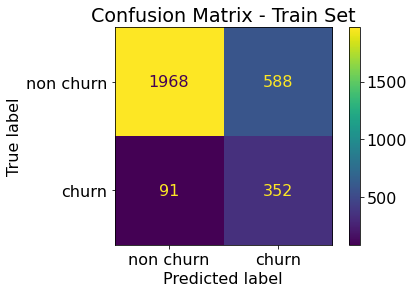

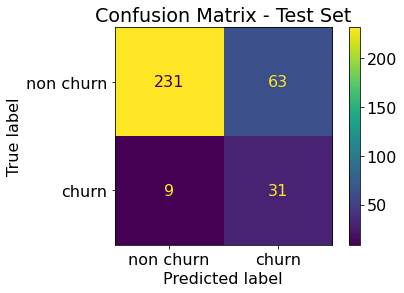

In [19]:
# Adapted from Lecture 8
cm_train = plot_confusion_matrix(pipe, X_train, y_train, display_labels=['non churn', 'churn'])
cm_test = plot_confusion_matrix(pipe, X_test, y_test, display_labels=['non churn', 'churn'])
# Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
cm_train.ax_.set_title('Confusion Matrix - Train Set');
cm_test.ax_.set_title('Confusion Matrix - Test Set');

#### 3(c)
rubric={points:5}

It is possible to read the precision and recall directly off these confusing matrices by normalizing them - see the `normalize` argument in the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html). 

1. Compute your final model's precision on the test set.
2. Normalize the confusion matrix such that you can read the precision off it, and show how you can do this.
3. Compute your final model's recall on the test set.
4. Normalize the confusion matrix such that you can read the recall off it, and show how you can do this.

Answer:
1. Precision on test set (calculated earlier): 0.32978723404255317.
2. When normalized for precision, you can read precision by the value in the bottom right (0.33/(0.33+0.67)).
3. Recall on the test set (calculated earlier): 0.775.
4. When normalized for recall, you can read recall by the value in the bottom right (0.78/(0.78 + 0.23)). Note: values in the denominator are actually TP=0.775 and FN=0.225, so the denominator will actually add up to 1.00.


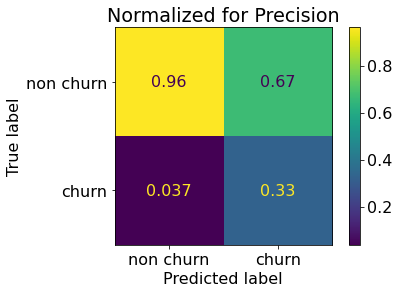

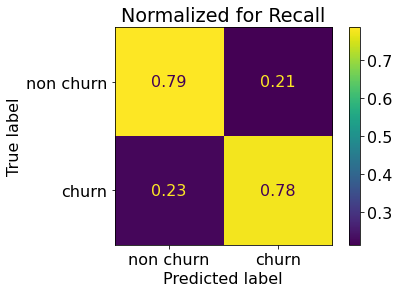

In [20]:
# Adapted from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
print('\033[1m' + 'Answer:' + '\033[0m')
print(f'1. Precision on test set (calculated earlier): {report_results["precision"].iloc[0]}.')
print('2. When normalized for precision, you can read precision by the value in the bottom right (0.33/(0.33+0.67)).')
cm_test = plot_confusion_matrix(pipe, X_test, y_test, display_labels=['non churn', 'churn'], normalize='pred')
cm_test.ax_.set_title('Normalized for Precision');
print(f'3. Recall on the test set (calculated earlier): {report_results["recall"].iloc[0]}.')
print('4. When normalized for recall, you can read recall by the value in the bottom right (0.78/(0.78 + 0.23)). Note: values in the denominator are actually TP=0.775 and FN=0.225, so the denominator will actually add up to 1.00.')
cm_test = plot_confusion_matrix(pipe, X_test, y_test, display_labels=['non churn', 'churn'], normalize='true')
cm_test.ax_.set_title('Normalized for Recall');

#### 3(d)
rubric={points:5}

The function below plots histograms of the predicted probability, split by the **true class**, for a given model and dataset. This is similar to the animated plots from lecture. 

Call this function twice, once for each of two models:

1. A pipeline with your chosen value of `C` and `class_weight='balanced'`
2. A pipeline with your chosen value of `C` and `class_weight=None`

Then, discuss your results: how do the two plots differ? Is `class_weight` changing things the way you expected? 


In [21]:
def make_hists(model, X, y):

    negative_examples = X[y == 0]
    positive_examples = X[y == 1]

    plt.hist(model.predict_proba(negative_examples)[:,1], alpha=0.5, bins=30, label="0", density=True)
    plt.hist(model.predict_proba(positive_examples)[:,1], alpha=0.5, bins=30, label="1", density=True)
    plt.legend(loc='upper right')

    plt.xlabel("predicted probability")
    plt.ylabel("normalized counts")

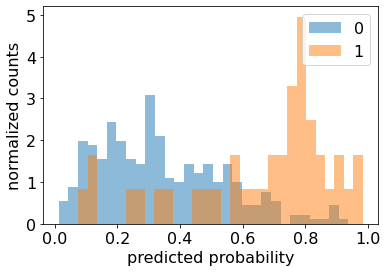

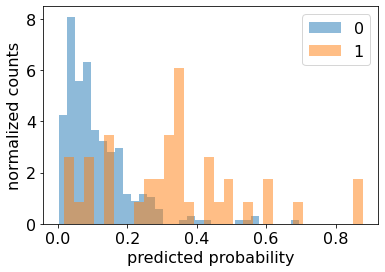

In [22]:
pipe_balanced = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced'))
])

pipe_none = Pipeline([
    ('preprocessing', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, C=0.1, class_weight=None))
])

pipe_balanced.fit(X_train, y_train)
pipe_none.fit(X_train, y_train)
make_hists(pipe_balanced, X_test, y_test)
plt.show()
make_hists(pipe_none, X_test, y_test)

**Answer:** In the first plot (`class_weight='balanced'`), more cases have a `predict_proba` >= 0.5, and therefore more of the true 'churns' (orange area) are predicted correctly. However, in the second plot, very few cases have a `predict_proba` >= 0.5, and therefore many of the true 'churns' (orange area) are being incorrectly labeled 'non churns'. Setting `class_weight='balanced'` mitigates inherent imbalance in plot 2 (where most cases are predicted false), and allows for more 'churns' to be correctly identified, because there are more `predict_proba`s to the right of 0.5.

## Exercise 4: Precision and recall by hand

Below is the confusion matrix of a machine learning system that predicts whether a cancer is malignant or not. Let's consider malignant to be the "positive class".

|    Actual/Predicted      | Predicted Benign | Predicted Malignant |
| :------------- | -----------------------: | -----------------------: |
| **Actual Benign**       | 6 | 238 |
| **Actual Malignant**       | 20 | 194 |

#### 4(a)
rubric={points:2}

Would you consider this an imbalanced dataset? Why or why not? Max 2 sentences.

    

**Answer:** I wouldn't consider this to be imbalanced, because the the actual number of `True` (interpreted here to mean malignant) cases represents $\frac{194+20}{194+20+6+238} \approx 46 \%$ of the data. Therefore, the actual target values are roughly equal ($46\%$ `True`, $54\%$ `False`).

#### 4(b)
rubric={points:2}

Based on the above confusion matrix, what is the recall? 

    

**Answer:** Recall is calculated by $\frac{TP}{TP+FN} = \frac{194}{194+20} = 0.90654206$.

#### 4(c)
rubric={points:5}

Do you consider this to be a good classifier? What additional information might you need to answer this question? Briefly discuss in 1-3 sentences.

    

**Answer:** I think this is a somewhat good classifier; the precision is $\frac{TP}{TP+FP} = \frac{194}{194+238} = 0.44907407$, and the f1 is $2 \times \frac{precision \times recall}{precision + recall} = \frac{0.40710453}{1.35561613} = 0.60061919$, but we might need to run hyperparameter optimization to see if the f1 score (or whichever metric we choose) can be improved. Low precision means that only ~45% of cancers flagged 'malignant' are actually malignant, but high recall means that we catch malignant cancers ~91% of the time, and _in my opinion_ it is more important to identify potentially malignant cancers than to accidentally mislabel benign ones as malignant. However, identifying this tradeoff is important and necessary information; what is the cost of mislabeling a benign tumor as malignant (false positive) vs. mislabeling a malignant tumor as benign (false negative)?

## Exercise 5: Very short answer questions
rubric={points:10}

Answer each of the following questions in **1-2 sentences**. Each one is worth 2 points.

1. One can think of `predict` as thresholding the output of `predict_proba` at some threshold. What is one scoring metric we talked about which is independent of this threshold? Briefly explain.
2. What is the difference between stratified cross-validation and regular cross-validation?
3. What is an advantage of ensembling multiple models as opposed to just choosing one of them?
4. What is an disadvantage of ensembling multiple models as opposed to just choosing one of them?
5. By default, `StackingClassifier` uses `LogisticRegression` as its "meta-model". Explain the significance of the coefficients learned by this `LogisticRegression` model.

**Answer:**
1. The precision-recall curve represents the tradeoff between the two metrics as the threshold value changes. Average precision (the area under this curve) is independant of the theshold value, because it describes the quality of `predict_proba` (the 'goodness' of this curve) accross all possible thresholds.
2. Stratified cross-validation, unlike regular cross-validation, ensures each fold preserves the same percentage of each class as the whole set. For example, if the set had 90% negative and 10% positive classes, each fold of the stratified cross-validation is guarenteed to contain 90% of the negative and 10% of the positive classes.
3. Ensembles, when variation exists between each sub-model, are usually effective at getting better predictions (as measured by the chosen metric). This is because deficiencies in each sub-model get 'smoothed' out by the other voting models.  
4. Ensembles are often slower because it has to run multiple steps for each sub-model, and the code is more complex to understand and maintain. The slowness of using multiple sub-models is made worse by hyperparameter optimization. 
5. `StackingClassifier` uses the outputs of each sub-model as the inputs to the `LogisticRegression` ensemble. Hence, the coefficients of `LogisticRegression` represent how much weight/influence each sub-model has in the final classification.

## Submission to Canvas

**IF YOU ARE WORKING WITH A PARTNER PLEASE FORM THE GROUP ON CANVAS BEFORE SUBMITTING** - see instructions [here](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md#partners).

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`.
2. Save your notebook.
3. Convert your notebook to `.html` format using the `convert_notebook()` function below **or** by `File -> Export Notebook As... -> Export Notebook to HTML`.
4. Run the code `submit()` below to go through an interactive submission process to Canvas.
>For this step, you will need a Canvas *Access Token* token. If you haven't already got one, log-in to Canvas, click `Account` (top-left of the screen), then `Settings`, then scroll down until you see the `+ New Access Token` button. Click that button, give your token any name you like and set the expiry date to Dec 31, 2020. Then click `Generate token`. Save this token in a safe place on your computer as you'll need it for all assignments. Treat the token with as much care as you would an important password. 

Note: for those having trouble with the Jupyter widgets and the dropdowns: if you add the argument `no_widgets=True` to your `submit` call, it should let you do a text-based entry of your key and avoid the dropdowns altogether. If this doesn't work, you probably need to upgrade to the latest version of `canvasutils` with `pip install canvasutils -U` from your terminal with your environment activated.


In [23]:
from canvasutils.submit import submit, convert_notebook

# Note: the canvasutils package should have been installed as part of your environment setup - 
# see https://github.com/UBC-CS/cpsc330/blob/master/docs/setup.md

In [26]:
# convert_notebook("hw4.ipynb", "html")  # uncomment and run when you want to try convert your notebook to HTML (or you can convert manually from the File menu)

Notebook successfully converted! 


In [27]:
# submit(course_code=53561, token=False)  # uncomment and run when ready to submit 

Please paste your token here and then hit enter:


 ······································································



Token successfully entered - thanks!


Select an assignment to submit to:


Output()